# Overview:
This is the review of the Titanic test.csv file for week 1.

###   Data Preparation

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

from pandas import DataFrame, Series

### Load the test file

In [12]:
testdata=pd.read_csv('test.csv')

In [13]:
# Info

testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
# Describe

testdata.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
# Review first five rows

testdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


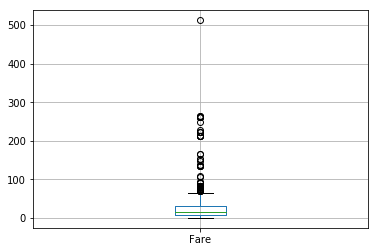

In [16]:
# Boxplot for Fare
testdata.boxplot(column='Fare')


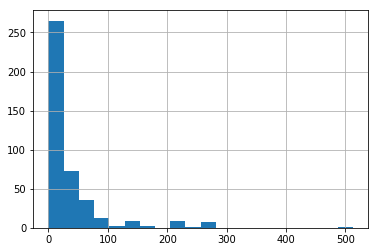

In [17]:
# Histogram for Fare
testdata['Fare'].hist(bins=20)

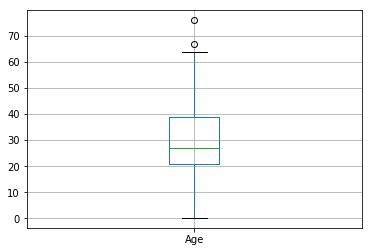

In [18]:
# Boxplot for Age
testdata.boxplot(column='Age')

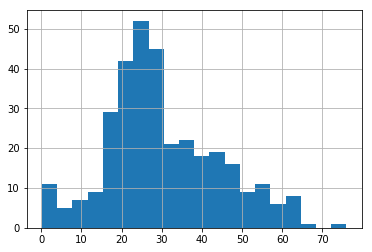

In [19]:
# Histogram for Age
testdata['Age'].hist(bins=20)


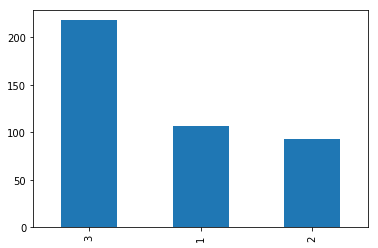

In [52]:
# Histogram for Class
testdata["Pclass"].value_counts().plot(kind='bar')


In [54]:
# Calc the correlation between Pclass and Fare
# Not surpisingly, they're negatively correlated
testdata['Fare'].corr(testdata['Pclass'])


-0.5771473123362404

In [67]:
# How many passengers were loaded at each embarkation point?
testdata.groupby(['Embarked'])['Fare'].count()

Embarked
C    102
Q     46
S    269
Name: Fare, dtype: int64

In [66]:
# Are there any patterns based on embarkation?
# C embarkation is clearly higher in age fare, and lower in class
# Q has far more single passengers
testdata.groupby(['Embarked'])['Age','SibSp','Parch','Pclass','Fare'].mean()

,Age,SibSp,Parch,Pclass,Fare
Embarked,,,,,
C,34.737805,0.421569,0.382353,1.794118,66.259765
Q,29.318182,0.195652,0.021739,2.869565,10.957700
S,28.758772,0.500000,0.459259,2.340741,28.230436
